##  libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

## dataset

In [2]:
data = pd.read_csv("BTC-USD.csv")

In [3]:
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-01-01,320.434998,320.434998,314.002991,314.248993,314.248993,8036550.0
1,2015-01-02,314.079010,315.838989,313.565002,315.032013,315.032013,7860650.0
2,2015-01-03,314.846008,315.149994,281.082001,281.082001,281.082001,33054400.0
3,2015-01-04,281.145996,287.230011,257.612000,264.195007,264.195007,55629100.0
4,2015-01-05,265.084015,278.341003,265.084015,274.473999,274.473999,43962800.0


In [4]:
data = data[['Adj Close']]

In [5]:
data

,Adj Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
2363,31676.693359
2364,32505.660156
2365,33723.027344
2366,34662.437500


In [6]:
df = data.dropna()

In [7]:
df

,Adj Close
0,314.248993
1,315.032013
2,281.082001
3,264.195007
4,274.473999
...,...
2363,31676.693359
2364,32505.660156
2365,33723.027344
2366,34662.437500


In [8]:
dataset = df.values
dataset = dataset.astype('float32')

In [9]:
dataset

array([[  314.249],
       [  315.032],
       [  281.082],
       ...,
       [33723.027],
       [34662.438],
       [33277.5  ]], dtype=float32)

In [10]:
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
dataset

array([[0.00214994],
       [0.00216231],
       [0.00162619],
       ...,
       [0.52972347],
       [0.5445581 ],
       [0.5226879 ]], dtype=float32)

In [12]:
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size, :], dataset[train_size:len(dataset), :]
print(len(train), len(test))

1583 781


In [13]:
def create_dataset(dataset, look_back=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-look_back-1):
    a = dataset[i:(i+look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [14]:
look_back = 10
trainX, trainY = create_dataset(train, look_back=look_back)
testX, testY = create_dataset(test, look_back=look_back)

In [15]:
trainX

array([[0.00214994, 0.00216231, 0.00162619, ..., 0.00166199, 0.00177346,
        0.00152692],
       [0.00216231, 0.00162619, 0.00135952, ..., 0.00177346, 0.00152692,
        0.00138265],
       [0.00162619, 0.00135952, 0.00152184, ..., 0.00152692, 0.00138265,
        0.00141638],
       ...,
       [0.08094246, 0.08148053, 0.08111172, ..., 0.08055613, 0.08038152,
        0.08064758],
       [0.08148053, 0.08111172, 0.08245137, ..., 0.08038152, 0.08064758,
        0.08005087],
       [0.08111172, 0.08245137, 0.08518326, ..., 0.08064758, 0.08005087,
        0.0816833 ]], dtype=float32)

In [16]:
trainY

array([0.00138265, 0.00141638, 0.00075417, ..., 0.08005087, 0.0816833 ,
       0.082504  ], dtype=float32)

In [17]:
trainX.shape

(1572, 10)

In [18]:
trainY.shape

(1572,)

In [19]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

## Build our Model

In [20]:
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=50, batch_size=256, verbose=1)

Epoch 1/50
7/7 [==============================] - 43s 4ms/step - loss: 0.0035
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0026
Epoch 3/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0020
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 5/50
7/7 [==============================] - 0s 5ms/step - loss: 0.0014
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0013
Epoch 7/50
7/7 [==============================] - ETA: 0s - loss: 0.001 - 0s 4ms/step - loss: 0.0011
Epoch 8/50
7/7 [==============================] - 0s 4ms/step - loss: 0.0011
Epoch 9/50
7/7 [==============================] - 0s 5ms/step - loss: 9.3008e-04
Epoch 10/50
7/7 [==============================] - 0s 4ms/step - loss: 7.6299e-04
Epoch 11/50
7/7 [==============================] - 0s 4ms/step - loss: 6.1982e-04
Epoch 12/50
7/7 [==============================] - 0s 4ms/step - loss: 5.5734e-04
Epoch 13/50
7/7 [===============

In [21]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

In [22]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [23]:
print(trainPredict)

[[ 508.64395]
 [ 501.80765]
 [ 489.64728]
 ...
 [5076.3506 ]
 [5033.766  ]
 [5115.8184 ]]


In [24]:
print(trainY)

[[ 265.65999846  267.79600318  225.86098703 ... 5247.35257259
  5350.72675541 5402.69764091]]


In [25]:
print(testPredict)

[[ 6068.05  ]
 [ 6394.063 ]
 [ 6559.816 ]
 [ 6820.449 ]
 [ 6756.821 ]
 [ 6853.538 ]
 [ 6949.2393]
 [ 7238.296 ]
 [ 7391.562 ]
 [ 7322.9946]
 [ 7618.283 ]
 [ 7908.136 ]
 [ 7808.7944]
 [ 7655.942 ]
 [ 7744.265 ]
 [ 7904.8296]
 [ 8206.186 ]
 [ 8149.45  ]
 [ 8182.551 ]
 [ 8156.4473]
 [ 8158.7734]
 [ 8284.125 ]
 [ 8162.632 ]
 [ 8263.934 ]
 [ 8279.642 ]
 [ 8173.3237]
 [ 8058.8286]
 [ 7883.951 ]
 [ 7990.6245]
 [ 8047.0645]
 [ 8028.05  ]
 [ 7873.711 ]
 [ 7729.2803]
 [ 8021.4453]
 [ 8088.7812]
 [ 8246.773 ]
 [ 8394.831 ]
 [ 8386.321 ]
 [ 8572.961 ]
 [ 8678.009 ]
 [ 9038.486 ]
 [ 9253.815 ]
 [ 9592.747 ]
 [ 9876.982 ]
 [10329.807 ]
 [10937.221 ]
 [10467.201 ]
 [11035.568 ]
 [11297.497 ]
 [11320.923 ]
 [10948.588 ]
 [11374.686 ]
 [11746.855 ]
 [11381.991 ]
 [11794.108 ]
 [11484.218 ]
 [11965.713 ]
 [11749.263 ]
 [11515.825 ]
 [11643.761 ]
 [11584.917 ]
 [12136.851 ]
 [11744.369 ]
 [11161.599 ]
 [11319.721 ]
 [11137.461 ]
 [11206.182 ]
 [11189.324 ]
 [11182.937 ]
 [10749.931 ]
 [10877.703 ]
 [1093

In [26]:
print(testY)

[[ 7814.91540226  7994.41623167  8205.16838237  7884.90945417
   7343.8955179   7271.20837086  8197.68924013  7978.30956007
   7963.32768504  7680.06673172  7881.84693131  7987.37209883
   8052.54424601  8673.2158597   8805.7786077   8719.96191419
   8659.48711373  8319.47300226  8574.50175057  8564.01717455
   8742.95796474  8208.99571028  7707.77098063  7824.23177513
   7822.02370134  8043.95163066  7954.12832121  7688.07713275
   8000.32990622  7927.71447439  8145.85801057  8230.92358154
   8693.83304101  8838.37506112  8994.48870897  9320.35227575
   9081.76329735  9273.52129535  9527.16008952 10144.55639375
  10701.69115593 10855.37120451 11011.10268574 11790.91697158
  13016.23184793 11182.80684434 12407.33190968 11959.3712985
  10817.15548637 10583.13457857 10801.67821017 11961.26986451
  11215.43726813 10978.45999487 11208.55072005 11450.84718645
  12285.95862281 12573.81218089 12156.51265589 11358.66199295
  11815.98615807 11392.37946845 10256.05845844 10895.09011134
   9477.6

In [27]:

trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:, 0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:, 0]))
print('Test Score: %.2f RMSE' % (testScore))


Train Score: 562.72 RMSE
Test Score: 2223.25 RMSE


In [28]:

trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict) + look_back, :] = trainPredict
 

In [29]:

testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict) + (look_back * 2) + 1:len(dataset) - 1, :] = testPredict
 


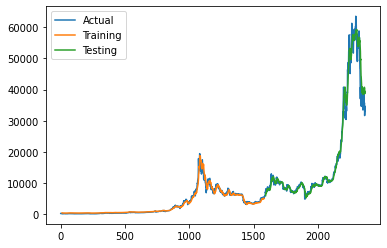

In [30]:
plt.plot(df['Adj Close'], label='Actual')
plt.plot(pd.DataFrame(trainPredictPlot, columns=["close"], index=df.index).close, label='Training')
plt.plot(pd.DataFrame(testPredictPlot, columns=["close"], index=df.index).close, label='Testing')
plt.legend(loc='best')
plt.show()